Pozor, tady se při scrapování stalo něco špatného, část interpretů se nenačetla správně.

In [1]:
import os
import json
import time
import pandas as pd
from src.vycisti import vycisti
from src.tabulka import tabulka
pd.set_option('display.max_columns', None)
with open(os.path.join("data_fixes", "opravy.json"), encoding="utf-8") as opravy:
    opravy = json.loads(opravy.read())
df = vycisti(pd.read_json(os.path.join("data", "filmy.json")), opravy)
pisne = vycisti(pd.read_json(os.path.join("data", "pisne.json")), opravy)

2023/06/13 00:08:09 z 4555 řádků odstraněno 133. Aktuální dataframe má 4422 řádků.
2023/06/13 00:08:09 z 10169 řádků odstraněno 8036. Aktuální dataframe má 2133 řádků.


In [2]:
df = df[["Film","Copyright","Režie","Žánr","Písně"]]

In [3]:
pisne = pisne.merge(df, on="Film")

In [4]:
pisne.sample()

,Film,Píseň,Hudba k písni,Text písně,Zpívá,Copyright,Režie,Žánr,Písně
1063,Strach (396973),"Tichá noc /Stille Nacht, heilige Nacht/",Franz Xaver Gruber (22651),Franz Joseph Mohr (129377),None,1973,[Miloš Bobek (96688)],etuda,"[Tichá noc /Stille Nacht, heilige Nacht/]"


In [5]:
pisne = pisne.explode("Hudba k písni").explode("Text písně").explode("Zpívá").explode("Žánr").explode("Režie")

In [6]:
pisne.groupby("Zpívá")["Film"].nunique().nlargest(50)

Zpívá
Karel Gott (3861)                        26
Setleři (129620)                         23
Waldemar Matuška (1787)                  21
Vlasta Burian (11992)                    18
Eva Pilarová (10373)                     17
Oldřich Kovář (104486)                   15
Václav Neckář (8835)                     15
Helena Vondráčková (12227)               14
Fanda Mrázek (128457)                    13
R. A. Dvorský (17596)                    13
Jan Werich (1287)                        12
Jiří Suchý (2270)                        12
Lucie Bílá (7010)                        11
Hana Vítová (126418)                     10
Hugo Haas (37289)                        10
Ladislav Pešek (53326)                   10
Oldřich Nový (12009)                     10
Jiří Korn (8831)                          9
Karel Černoch (22440)                     9
Lída Baarová (5202)                       9
Michal David (7475)                       9
Míla Spazierová-Hezká (126963)            9
Eva Olmerová (4746)       

In [7]:
pisne.groupby("Zpívá")["Režie"].nunique().nlargest(20)

Zpívá
Karel Gott (3861)             23
Setleři (129620)              18
Waldemar Matuška (1787)       18
Eva Pilarová (10373)          14
Helena Vondráčková (12227)    14
Václav Neckář (8835)          14
Jiří Suchý (2270)             13
Vlasta Burian (11992)         13
R. A. Dvorský (17596)         12
Lucie Bílá (7010)             11
Oldřich Kovář (104486)        11
Jan Werich (1287)             10
Lída Baarová (5202)           10
Oldřich Nový (12009)          10
Hana Zagorová (23365)          9
Ladislav Pešek (53326)         9
Eva Olmerová (4746)            8
Fanda Mrázek (128457)          8
Hana Hegerová (13526)          8
Hana Vítová (126418)           8
Name: Režie, dtype: int64

In [8]:
pisne.groupby("Text písně")["Film"].nunique().nlargest(20)

Text písně
Jaroslav Mottl (55549)       67
Jiří Suchý (2270)            40
Pavel Kopta (42048)          37
Karel Melíšek (127503)       29
Zdeněk Borovec (2828)        29
Zdeněk Rytíř (16047)         25
K. M. Walló (51350)          22
Karel Hašler (12006)         21
Jan Werich (1287)            20
František Kudrna (129582)    19
Jiří Voskovec (1781)         18
Karel Tobis (3635)           18
Jiří Štaidl (2827)           16
Ladislav Brom (51446)        16
Zdeněk Svěrák (1892)         14
Ivo Fischer (2835)           13
Eduard Krečmar (22460)       12
Saša Razov (127510)          12
Vladimír Sís (5326)          11
Josef Kainar (15007)         10
Name: Film, dtype: int64

In [9]:
pisne.groupby("Hudba k písni")["Film"].nunique().nlargest(20)

Hudba k písni
Josef Stelibský (31111)    42
Josef Dobeš (79567)        41
Jiří Šlitr (2822)          35
Jára Beneš (53046)         32
Jaroslav Ježek (1780)      26
Petr Hapka (193)           26
Jiří Srnka (64086)         22
Karel Svoboda (2860)       22
Eman Fiala (64088)         21
Karel Hašler (12006)       21
Karel Mareš (2820)         20
Zdeněk Liška (3251)        19
Josef Kumok (43206)        18
Jaromír Vejvoda (11729)    16
Luboš Fišer (1492)         16
Vlastimil Hála (69987)     16
Julius Kalaš (11040)       15
Ladislav Štaidl (8125)     15
Angelo Michajlov (5083)    14
Jaroslav Uhlíř (9261)      14
Name: Film, dtype: int64

In [10]:
pisne.groupby(["Režie","Zpívá"])["Film"].nunique().nlargest(10)

Režie                       Zpívá                     
Martin Frič (20324)         Vlasta Burian (11992)         9
Jaroslav Soukup (1171)      Michal David (7475)           5
Martin Frič (20324)         Hugo Haas (37289)             5
Karel Lamač (37847)         Vlasta Burian (11992)         4
Miroslav Cikán (31969)      Setleři (129620)              4
Svatopluk Innemann (33860)  Fanda Mrázek (128457)         4
Alexandra Májová (29008)    David Novotný (1834)          3
                            Lukáš Příkazký (20116)        3
František Vláčil (5191)     Kühnův smíšený sbor (5381)    3
Josef Pinkava (8992)        Eva Pilarová (10373)          3
Name: Film, dtype: int64

In [11]:
pisne.groupby("Píseň")["Film"].nunique().nlargest(10)

Píseň
Škoda lásky                                13
Kde domov můj                               8
Tichá noc /Stille Nacht, heilige Nacht/     8
Hej, Slované                                7
Ktož jsú boží bojovníci                     7
V Hodoníně za vojáčka mňa vzali             7
Zelení hájové                               7
Ach, ta láska nebeská                       5
Die Fahne hoch /Horst Wessel Lied/          5
Kolíne, Kolíne                              5
Name: Film, dtype: int64

In [12]:
df_pisne = df.explode("Písně")

In [13]:
df_pisne.groupby("Písně")["Film"].nunique().nlargest(10)

Písně
Kde domov můj                    34
Škoda lásky                      28
Zelení hájové                    22
Internacionála                   19
Ktož jsú boží bojovníci          19
Život je jen náhoda              19
Už mou milou do kostela vedou    17
Šly panenky silnicí              16
Jen pro ten dnešní den           15
Kolíne, Kolíne                   15
Name: Film, dtype: int64

In [14]:
pisnickyyy = pd.DataFrame(df_pisne.groupby("Písně")["Film"].nunique().nlargest(10))

In [15]:
pisnickyyy["Píseň"] = pisnickyyy.index
pisnickyyy["Počet filmů"] = pisnickyyy["Film"]
pisnickyyy = pisnickyyy.drop(columns=["Film"])
pisnickyyy["Poprvé"] = pisnickyyy["Píseň"].apply(lambda x: df_pisne[df_pisne["Písně"] == x]["Copyright"].min())
pisnickyyy["Naposled"] = pisnickyyy["Píseň"].apply(lambda x: df_pisne[df_pisne["Písně"] == x]["Copyright"].max())

In [16]:
tabulka(pisnickyyy, titulek="Nejčastější písně českých filmů")

<table class="dataframe table table--responsive table--w100p table--striped-red table--plain"><caption>Nejčastější písně českých filmů</caption><thead><tr style="text-align: right;"><th class="text-nowrap">Píseň</th><th class="text-nowrap">Počet filmů</th><th class="text-nowrap">Poprvé</th><th class="text-nowrap">Naposled</th></tr></thead><tbody class="text-sm"><tr><td>Kde domov můj</td><td>34</td><td>1930</td><td>2022</td></tr><tr><td>Škoda lásky</td><td>28</td><td>1948</td><td>2012</td></tr><tr><td>Zelení hájové</td><td>22</td><td>1930</td><td>1988</td></tr><tr><td>Internacionála</td><td>19</td><td>1949</td><td>2017</td></tr><tr><td>Ktož jsú boží bojovníci</td><td>19</td><td>1945</td><td>2022</td></tr><tr><td>Život je jen náhoda</td><td>19</td><td>1932</td><td>2021</td></tr><tr><td>Už mou milou do kostela vedou</td><td>17</td><td>1930</td><td>1979</td></tr><tr><td>Šly panenky silnicí</td><td>16</td><td>1931</td><td>2021</td></tr><tr><td>Jen pro ten dnešní den</td><td>15</td><td>1939<

In [17]:
pisne.groupby("Text písně")["Píseň"].nunique().nlargest(10)

Text písně
Jaroslav Mottl (55549)       66
Pavel Kopta (42048)          37
Jiří Suchý (2270)            33
Karel Melíšek (127503)       29
Zdeněk Borovec (2828)        28
Zdeněk Rytíř (16047)         24
K. M. Walló (51350)          21
František Kudrna (129582)    18
Karel Hašler (12006)         18
Karel Tobis (3635)           18
Name: Píseň, dtype: int64

In [18]:
pisne.groupby("Zpívá")["Píseň"].nunique().nlargest(10)

Zpívá
Karel Gott (3861)             24
Setleři (129620)              23
Vlasta Burian (11992)         18
Waldemar Matuška (1787)       18
Oldřich Kovář (104486)        15
Václav Neckář (8835)          15
Eva Pilarová (10373)          14
Fanda Mrázek (128457)         13
Helena Vondráčková (12227)    13
R. A. Dvorský (17596)         13
Name: Píseň, dtype: int64

In [19]:
pisne[pisne["Zpívá"] == "Karel Gott (3861)"].groupby("Píseň")["Film"].nunique().nlargest(20)

Píseň
Bum, bum, bum                  3
...a to mám rád                1
Beatles                        1
C' est la vie                  1
C'est la vie                   1
C’est la vie                   1
Daleká cesta, daleká           1
Den je krásný                  1
Kdepak ty ptáčku hnízdo máš    1
Když draka bolí hlava          1
Kufr iluzí                     1
Muka obraznosti                1
Mám zlatej důl                 1
Máš-li s kým                   1
Oudolím, oudolím               1
Oči sněhem zaváté              1
Svět je dlouhá ulice           1
Tam kam chodí vítr spát        1
Tvůj stín se má                1
Vůně mléka                     1
Name: Film, dtype: int64

In [20]:
pisne.groupby(["Píseň","Zpívá"])["Film"].nunique().nlargest(10)

Píseň                     Zpívá                   
Ach, ta láska nebeská     Eva Pilarová (10373)        4
                          Waldemar Matuška (1787)     4
Bum, bum, bum             Karel Gott (3861)           3
Štěstí je krásná věc      Richard Müller (6857)       3
Cikánský baron jsem já    Miloš Kopecký (4959)        2
Což takhle dát si špenát  Jiří Schelinger (25196)     2
Hřebík v botě             Jan Hammer (126512)         2
Každý má pohádku svou     Lída Baarová (5202)         2
Milujem' to, co ztrácíme  Lída Baarová (5202)         2
Měsíc                     Yvonne Přenosilová (910)    2
Name: Film, dtype: int64

<Axes: xlabel='Copyright'>

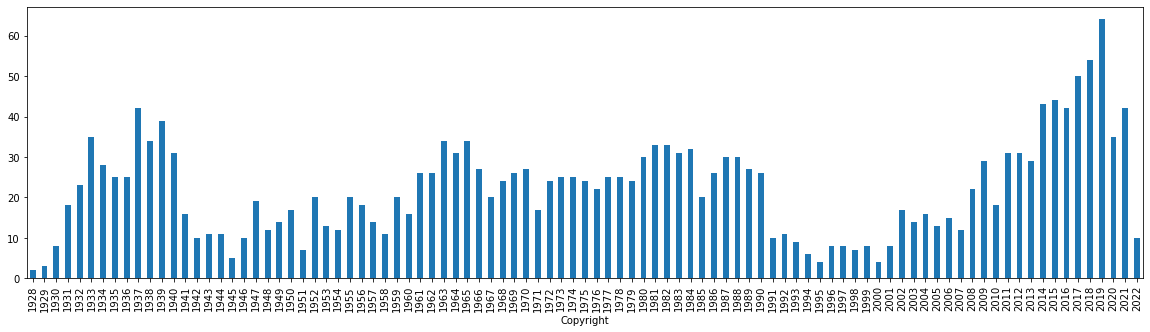

In [21]:
pisne.groupby("Copyright")["Píseň"].nunique().plot.bar(figsize=(20,5))

In [22]:
pisne.groupby("Film")["Píseň"].nunique().nlargest(20)

Film
...a bude hůř (45816)                    1
...a pozdravuji vlaštovky (396886)       1
...ani smrt nebere! (8552)               1
...nebo být zabit (397490)               1
10 pravidel jak sbalit holku (400532)    1
2Bobule (112494)                         1
3 sezóny v pekle (37531)                 1
3Bobule (402068)                         1
5 milionů svědků (396634)                1
6 medvědů s Cibulkou (396956)            1
7 zabitých (396646)                      1
8 hlav šílenství (401655)                1
A proč.....?? (395676)                   1
A pátý jezdec je Strach (396610)         1
A to všechno za týden (396564)           1
A v tom zámku... (400451)                1
AEIOU (397656)                           1
Absence blízkosti (401273)               1
Abstinent (401996)                       1
Ad akta (397301)                         1
Name: Píseň, dtype: int64